In [ ]:
# Add the 'drive' package of 'gogle.colab' to access Gogle Drive.
from google.colab import drive

# Added the google drive to the Colab environment's '/content/drive' directory.
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# To manipulate and analyze data, importedd the pndass package.
import pandas as pd

# Load the numpy library in order to carry out numerical calculations and array operations.
import numpy as np

# Use the matplotlib.pyplot module to import visualizations (such as plots and graphs) in order to construct them.
import matplotlib.pyplot as pltted

# Import the Seaborn library, which is based on matplotlib and is used for statistical data visualization.
import seaborn as sssns

# Import the warnings module and suppress warning messages to keep the output clean.
import warnings
warnings.filterwarnings('ignore')

# Import various evaluation metrics to assess the model's performance from slearn.
#accuracy_score: Indicates the model's total accuracy.
#precision_score: Determines the proportion of relevant items in the selection.
#recall_score: Indicates the proportion of pertinent items chosen.
#f1_score: Provides a statistic that combines recall and precision.
#classification_report: Offers a thorough classification report including support, f1-scor, recal, && precission.
#conflict_matrix: Shows the confusion matrix to assess the accuracy of the model predictions.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [ ]:
# Read the CSV file from the specified path into a pandas DataFrame.
# This file contains data related to the CICIDS 2017 dataset for cybersecurity analysis.
cic_ids_2017 = pd.read_csv('/content/drive/MyDrive/Pooja_Fullcode/CICIDS_2017_CODE/combined.csv')

# Show the DataFrame's shape, which provides the dataset's row and column counts.
cic_ids_2017.shape

(2830743, 79)

In [ ]:
# Show the DataFrame {cic_ids_2017}'s first five rows.
# This gives an overview of the data, including column names and a preview of the content in each row.
cic_ids_2017.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Randomly shuffle the rows of the DataFrame `cic_ids_2017`.
# The `frac=1` ensures that 100% of the data is sampled, which effectively shuffles the entire dataset.
# Resetting the shuffle DataFrame's index with {reset_index(drop=True)} removes the earlier index and prevents it from being added as a new column.
cic_ids_2017 = cic_ids_2017.sample(frac=1).reset_index(drop=True)

# Re-display the DataFrame's form to ensure that, even after shuffling, the number for rows and columns stays the same.
cic_ids_2017.shape


(2830743, 79)

In [ ]:
# Determine how many times each distinct value appears in the DataFrame {cic_ids_2017}'s 'Labelld' column.
# The number of instances that fall into each class and category (such as attack kinds or regular traffic) is broken down below.
cic_ids_2017[' Label'].value_counts()


,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [ ]:
# Create a new dataframe with the specified class distributions.
benign_df = cic_ids_2017[cic_ids_2017[' Label'] == 'BENIGN'].sample(n=25000, random_state=42)
dos_hulk_df = cic_ids_2017[cic_ids_2017[' Label'] == 'DoS Hulk'].sample(n=23107, random_state=42)
portscan_df = cic_ids_2017[cic_ids_2017[' Label'] == 'PortScan'].sample(n=15893, random_state=42)
ddos_df = cic_ids_2017[cic_ids_2017[' Label'] == 'DDoS'].sample(n=12802, random_state=42)

# Get the remaining classes with their original counts.
remaining_classes = cic_ids_2017[~cic_ids_2017[' Label'].isin(['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS'])]

# Combine the sampled dataframes.
new_cicids = pd.concat([benign_df, dos_hulk_df, portscan_df, ddos_df, remaining_classes], axis=0)

# Shuffle the new dataframe.
new_cicids = new_cicids.sample(frac=1).reset_index(drop=True)
new_cicids.shape

(116418, 79)

In [ ]:
# Count the instances of every distinct value in the DataFrame {cic_ids_2017}'s 'Label' column.
## This provides an overview of the number of occurrences that fall into each class and category (e.g., attack kinds or regular traffic).
new_cicids[' Label'].value_counts()

cicids = new_cicids

,count
Label,
BENIGN,25000
DoS Hulk,23107
PortScan,15893
DDoS,12802
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [ ]:
# Replace occurrences of the value 'Web Attack � Brute Force' in the 'Label' column
# with the new value 'Attack_Brute Force' to standardize and simplify the label names.
cicids[' Label'] = cicids[' Label'].replace('Web Attack � Brute Force', 'Attack_Brute Force')

# Similarly, replace 'Web Attack � Sql Injection' with 'Attack_Sql Injection' in the 'Label' column.
cicids[' Label'] = cicids[' Label'].replace('Web Attack � Sql Injection', 'Attack_Sql Injection')

# Finally, replace 'Web Attack � XSS' with 'Attack_XSS' to standardize this attack label in the 'Label' column.
cicids[' Label'] = cicids[' Label'].replace('Web Attack � XSS', 'Attack_XSS')


In [ ]:
# Output the quantity of distinct values found in the DataFrame {cicids}'s 'Label' column.
# This provides information on how many distinct classes or categories are present in the dataset.
print(len(cicids[' Label'].unique()))

# Print a separator line for better readability of the output.
print('=========================================')

# Print the unique values in the 'Label' column to see the distinct labels or categories in the dataset.
print(cicids[' Label'].unique())


15
['DoS GoldenEye' 'DoS Slowhttptest' 'SSH-Patator' 'Bot' 'DDoS' 'PortScan'
 'BENIGN' 'DoS Hulk' 'DoS slowloris' 'FTP-Patator' 'Attack_XSS'
 'Attack_Brute Force' 'Attack_Sql Injection' 'Infiltration' 'Heartbleed']


In [ ]:
# Determine how many missing (null) values there are in the whole {cicids} DataFrame.
# {isnull()} generates a data frame of the identical layout, but instead of values, it uses boolean values to indicate missing values.
# `sum()` applied twice first counts missing values per column and then sums these counts across all columns.
cicids.isnull().sum().sum()


100

In [ ]:
# Take out of the DataFrame {cicids} those rows that have missing (null) values.
# `inplace=True` modifies the original DataFrame directly without needing to assign the result to a new variable.
cicids.dropna(inplace=True)

# Remove all duplicate rows from the DataFrame `cicids`.
# `inplace=True` ensures that the original DataFrame is updated in place, removing any exact duplicate rows.
cicids.drop_duplicates(inplace=True)


In [ ]:
# Display the shape of the DataFrame `cicids` after removing missing values and duplicates.
# The revised DataFrame's row and column counts are displayed below.
cicids.shape


(103995, 79)

In [ ]:
# Calculate the total number of missing (null) values in the DataFrame `cicids` after dropping rows with null values.
# This ensures that there are no remaining missing values in the DataFrame.
cicids.isnull().sum().sum()


0

In [ ]:
# Determine how many times each distinct value appears in the DataFrame {cicids}'s 'Label' column.
# This gives an overview of how the various classes or categories within the dataset are distributed.
cicids[' Label'].value_counts()


,count
Label,
BENIGN,24697
DoS Hulk,17742
PortScan,14560
DDoS,12802
DoS GoldenEye,10286
FTP-Patator,5933
DoS slowloris,5385
DoS Slowhttptest,5228
SSH-Patator,3219


In [ ]:
# Show the shape in the the DataFrame {cicids} to show the number for each column and row.
# This gives a summary of the DataFrame's current size following any data processing or cleaning.
cicids.shape


(103995, 79)

In [ ]:
# Check for infinite values.
print(cicids.isin([np.inf, -np.inf]).any().any())

True


In [ ]:
# Check for infinite values in each column.
print(cicids.isin([np.inf, -np.inf]).any())

 Destination Port              False
 Flow Duration                 False
 Total Fwd Packets             False
 Total Backward Packets        False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
 Idle Std                      False
 Idle Max                      False
 Idle Min                      False
 Label                         False
Length: 79, dtype: bool


This code uses `StandardScaler` to normalize the numerical properties of the `cicids` DataFrame. In order to prevent problems during scaling, it first substitutes NaN for any infinite numbers. In order to guarantee that the features have the same scale using machine learning models, it then chooses numeric columns or applies standardization by eliminating the mean or scaled to unit varianced.


In [ ]:
# Bring in a StandardIn order to normalize features, the Scaler class from sklearn.preprocessing removes the mean and scales to unit variance.
from sklearn.preprocessing import StandardScaler

# Replace infinite values (both positive and negative infinity) with NaN in the DataFrame `cicids`.
# This ensures that the scaling process does not encounter issues with infiiniite values.
cicids.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select columns with numeric data types (integer and float) from the DataFrame `cicids`.
# `select_dtypes()` filters columns based on their data types, and `include=['int64', 'float64']` specifies these types.
numeric_columns = cicids.select_dtypes(include=['int64', 'float64']).columns

# Instantiate the StandardScaler object for standardizing numerical features.
scaler = StandardScaler()

# Scale the DataFrame {cicids}'s numeric columns according to usual procedure.
# After calculating the standard deviation and mean, the data is transformed using `fit_transform()`.
cicids[numeric_columns] = scaler.fit_transform(cicids[numeric_columns])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make an object called LabelEncoder.
label_encoder = LabelEncoder()

# Select the object and category columns
object_cat_cols = cicids.select_dtypes(include=['object', 'category'])

# Iterate through each column and apply label encoding
for col in object_cat_cols:
    cicids[col] = label_encoder.fit_transform(cicids[col])

# Print the altered DataFrame's initial few rows.
cicids.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.309388,1.842996,-0.009752,-0.009549,-0.038301,-0.006817,-0.333953,-0.15837,-0.318491,-0.349561,...,0.003116,-0.24995,-0.148308,-0.25677,-0.206863,2.251861,-0.211114,2.152356,2.285409,6
1,-0.309388,-0.147285,-0.009752,-0.008660,-0.037444,-0.006817,-0.308638,-0.15837,-0.270504,-0.297205,...,0.003116,-0.24995,-0.148308,-0.25677,-0.206863,-0.556772,-0.211114,-0.583496,-0.526222,8
2,-0.314114,-0.364614,0.013231,0.018900,0.084594,-0.005683,0.823310,-0.15837,0.337010,0.391105,...,0.003116,-0.24995,-0.148308,-0.25677,-0.206863,-0.556772,-0.211114,-0.583496,-0.526222,14
3,-0.314114,-0.403775,0.013231,0.018011,0.084594,-0.005683,0.823310,-0.15837,0.337010,0.391105,...,0.003116,-0.24995,-0.148308,-0.25677,-0.206863,-0.556772,-0.211114,-0.583496,-0.526222,14
4,0.342464,-0.674141,-0.007333,-0.006882,-0.025693,-0.006762,0.016842,-0.15837,0.034559,0.153094,...,0.003069,-0.24995,-0.148308,-0.25677,-0.206863,-0.556772,-0.211114,-0.583496,-0.526222,4


In [ ]:
# Remove the unnecessary columns from the table.

cicids.drop(columns=[' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], inplace=True)


In [ ]:
# drop nan value.
cicids.dropna(inplace=True)


In [ ]:
# remove duplicates
cicids.drop_duplicates(inplace=True)

print(cicids.shape)


(103960, 71)


In [ ]:
# divide data into X and y.
X = cicids.drop(' Label', axis=1)
y = cicids[' Label']

X.shape, y.shape

((103960, 70), (103960,))

In [ ]:
# Counting the values using value_counts.
y.value_counts()

,count
Label,
3,24682
7,17742
13,14547
5,12802
6,10286
10,5931
9,5385
8,5228
14,3219


In [ ]:
# SelectKBest is imported from the feature_selection module of scikit-learn. This function is helpful for feature selection with machine learning since it chooses the top 'k' features according to a scoring system.
# Bringing in mutual_info_classif from the feature_selection module of scikit-learn.
# The mutual information, or measure of dependency, between each feature & the target variable is estimated using this scoring formula. It helps choose the most pertinent features for categorization tasks.
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Construct a SelectKBest class with k=25 and mutuall_info_classified.
selector = SelectKBest(mutual_info_classif, k=25)

#Transform the data by fitting the selector to it.
X_selected = selector.fit_transform(X, y)
X_selected

array([[ 1.84299608, -0.03830125, -0.00681693, ...,  0.00270968,
        -0.03830125, -0.00681737],
       [-0.1472845 , -0.03744441, -0.00681693, ...,  0.00270968,
        -0.03744441, -0.00681737],
       [-0.36461372,  0.08459413, -0.00568315, ...,  0.00389307,
         0.08459413, -0.00568321],
       ...,
       [ 1.47945769, -0.0160846 , -0.00202782, ...,  0.00297095,
        -0.0160846 , -0.00202663],
       [ 0.91254024, -0.03830125, -0.00681693, ...,  0.00312464,
        -0.03830125, -0.00681737],
       [-0.47693317, -0.03646516, -0.00681693, ...,  0.00277884,
        -0.03646516, -0.00681737]])

# Smoteen.

The `imblearn` library's SMOTEENN technique, which combines SMOTE in oversampling purposes the minority class & ENN for eliminating noise in the majority of the class, is used in this code to address class imbalance. It counts the class variations prior to and after balancing after fitting then resampling the initial data, and it saves these counts to a DataFrame. In order to illustrate the original balanced class distributions, the code uses Plotly to construct a figure with two subplots. It then updates the layout with titles as labels and shows the plot for comparison.


In [ ]:
# Using a imblearn library (imbalanced-learn) to import SMOTEENN.
# By sampling too much the minority class & eliminating noisy cases from the majority class, SMOTEENN, a hybrid of SMOTE (The synthetic Minority Oversampling Technique) & ENN (Edited Near Neighbors), is used to address unbalanced datasets.
from imblearn.combine import SMOTEENN

# Plotly's graph_objects module, which enables the creation of intricate and adaptable visualizations, is imported.
# In Plotly, 'go' is a shorthand for working alongside graph objects, such as charts, traces, and figures.
import plotly.graph_objects as go

# Bringing in make_subplots from the subplots module of Plotly.
# many charts (such as scatter plots, histograms, etc.) can be arranged in a grid using the make_subplots function, which is used to construct figures with many subplots in one visualization.
from plotly.subplots import make_subplots

# Initialize SMOTEENN.
smoteenn = SMOTEENN(random_state=42)

# Fit and resample the training data.
X_aug, y_aug = smoteenn.fit_resample(X_selected, y)

# Before balancing.
y_before = pd.Series(y).value_counts()

# After balancing.
y_after = pd.Series(y_aug).value_counts()

# To plot, create a DataFrame.
df_before_after = pd.DataFrame({'Before Balancing': y_before, 'After Balancing': y_after})

# Create the subplots.
figgure = make_subplots(rows=1, cols=2, subplot_titles=("Class Distribution Before Balancing", "Class Distribution After Balancing"))

# Add bar chart for Before Balancing.
figgure.add_trace(go.Bar(x=df_before_after.index, y=df_before_after['Before Balancing'], name='Before Balancing'), row=1, col=1)

# Add bar chart for After Balancing.
figgure.add_trace(go.Bar(x=df_before_after.index, y=df_before_after['After Balancing'], name='After Balancing'), row=1, col=2)

# Update layout.
figgure.update_layout(title_text="Class Distribution Before and After Balancing", xaxis_title="Class", yaxis_title="Count", showlegend=False)

# Show plot.
figgure.show()

In [ ]:
# Split dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_aug, y_aug, test_size=0.2, random_state=42)

Key classification performance parameters accuracy, precision, recall, & F1 score are computed and shown via the `model_performance` function. To guarantee that class imbalance and multi-class jobs is handled effectively, it begins by computing the metrics via `average='weighted'` utilizing the true labels (`y`) or predicted values (`prediction`). The function then provides a succinct report of the model's performance by printing these metrics formatted into two decimal places. A thorough classification report with each class's accuracy, recall, F1 rating, and assistance is also printed.

The function uses confusion_matrix to generate and plot the confusion matrix on a heatmap to facilitate visual interpretation. This makes it possible to see both accurate and inaccurate forecasts for various classes. A color-coded heatmap that shows the predicted actual labels on the y and x axes, respectively, is used to illustrate the confusion matrix. This set of metric computations and visualizations offers a thorough assessment of the model's functionality.



In [ ]:
def model_performance(y, prediction, title):
    # This function takes in the true labels (y), predicted labels (prediction),
    # and the title for the confusion matrix plot (title).

    # Calculate the performance metrics.
    accuracy = accuracy_score(y, prediction)
    # Calculate the accuracy of the predictions (the proportion of correctly predicted labels).

    precision = precision_score(y, prediction, average='weighted')
    # Calculate the precision, which is the ratio of true positive predictions to
    # the total number of positive predictions (weighted average accounts for label imbalance).

    recall = recall_score(y, prediction, average='weighted')
    # Calculate the recall, which is the ratio of true positives to the actual positive cases
    # (weighted average accounts for label imbalance).

    f1 = f1_score(y, prediction, average='weighted')
    # Calculate the F1 score, which is the harmonic mean of precision and recall
    # (weighted average accounts for label imbalance).

    # Print performance metrics.
    print('=====================================================')
    print('Accuracy Score : {:.4f}'.format(accuracy))
    # Print the accuracy score formatted to 4 decimal places.

    print('Precision Score: {:.4f}'.format(precision))
    # Print the precision score formatted to 4 decimal places.

    print('Recall Score   : {:.4f}'.format(recall))
    # Print the recall score formatted to 4 decimal places.

    print('F1 Score       : {:.4f}'.format(f1))
    # Print the F1 score formatted to 4 decimal places.

    print('=====================================================')
    # Print a separator for clarity in the output.

    # print classification report.
    print(classification_report(y, prediction))
    # Print a detailed classification report, showing precision, recall, F1 score, and support for each class.

    print('=====================================================================================')
    # Print a separator for clarity before displaying the confusion matrix.

    # Get the confusion matrix.
    cm_dectree = confusion_matrix(y, prediction)
    # Compute the confusion matrix, which shows the actual vs. predicted labels in a table format.

    # Create a heatmap of the confusion matrix.
    pltted.figure(figsize=(9, 7))
    # Create a new figure for plotting, with a specified size of 9x7 inches.

    sssns.heatmap(cm_dectree, annot=True, cmap="Blues", fmt="d")
    # Create a heatmap of the confusion matrix using Seaborn, where 'annot=True' displays the values in the matrix,
    # 'cmap="Blues"' sets the color scheme, and 'fmt="d"' formats the values as integers.

    pltted.xlabel("Predicted label")
    # Label the x-axis as "Predicted label".

    pltted.ylabel("True label")
    # Label the y-axis as "True label".

    pltted.title(title)
    # Set the title of the plot using the provided 'title' argument.

    pltted.show()
    # Display the confusion matrix heatmap.


The ROC curves of multi-class classification are visualized using the `plot_multiclass_roc` function. For ROC calculations, it first decides how many classes there are and binarizes the actual labels. The function uses a loop to calculate the AUC, FPR, and TPR for each class, and then prints the results for each class. Additionally, it computes the AUC and micro-average ROC curve, which treat each class equally. Lastly, the program plots the micro-average curve and the ROC curves for each class in different colors. It then styles the plot using labels, a title, or a legend while displaying it.


In [ ]:
# Import the required metrics: `auc` is used to calculate the area under the curve for ROC, `roc_curve` determines the receiver operating parameter (ROC) is curve, and `roc_auc_score` computes the Area Over the Curve (AUC).
from sklearn.metrics import roc_curve, roc_auc_score, auc
# To convert multi-class labels to a digital format for ROC analysis, use `label_binarize`.
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc(y_true, y_pred_proba):
    # The ROC curve of multiclass classification is plotted by this function.
    # y_true: true labels for classes.
    # y_pred_proba: each class's expected probability.

    # Number of classes
    n_classes = y_pred_proba.shape[1]
    # Determine the number of classes from the second dimension of the predicted probabilities array.

    # Binarize the output labels
    y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))
    # Convert the true class labels to a binary form (one-hot encoding) to calculate ROC for each class.
    # `np.arange(n_classes)` creates a range of classes from 0 to `n_classes - 1`.

    # Determine each class's ROC curve & ROC AUC.
    fpr = {}
    tpr = {}
    roc_auc = {}
    # Initialize dictionaries to store false positive rates (fpr), true positive rates (tpr), and ROC-AUC scores for each class.

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        # Compute the false positive rate (fpr) and true positive rate (tpr) for each class using the ROC curve function.
        # `_` captures the threshold values, which are not used here.

        roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute the area under the ROC curve (AUC) for each class.

        print(f"Class {i} ROC-AUC: {roc_auc[i]:.8f}")
        # Print the ROC-AUC score for each class, formatted to 8 decimal places.

    # Compute ROC curve and ROC AUC for the micro average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_proba.ravel())
    # Calculate the micro-average's ROC curve, which combines the outcomes of every class.
    # To treat the outcomes of all classes as one binary classification problem, `.ravel()` flattens the arrays.

    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Compute the AUC for the micro-average ROC curve.

    print(f"Micro-average ROC-AUC: {roc_auc['micro']:.8f}")
    # Print the ROC-AUC score for the micro-average.

    # Plot all ROC curves
    pltted.figure(figsize=(10, 8))
    # Create a new figure for plotting, with a size of 10x8 inches.

    colors = pltted.cm.rainbow(np.linspace(0, 1, n_classes))
    # Create a color map that will generate distinct colors for each class, spaced evenly across the rainbow color spectrum.

    for i, color in zip(range(n_classes), colors):
        pltted.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
        # Using the appropriate color, plot the area under the ROC curve of each class. Then, add a label that displays the class & its AUC score.
        # `lw=2` establishes the curve's line width.

    pltted.plot(fpr["micro"], tpr["micro"], color='navy', lw=2, linestyle=':', label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})')
    # Use a dot line (linestyle=':') and a navy blue color to plot a micro-average ROC curve.

    pltted.plot([0, 1], [0, 1], color='gray', linestyle='--')
    # Draw the diagonal line (the baseline), which represents the ROC curve of a random classifier, from (0, 0) to (1, 1).

    pltted.xlim([0.0, 1.0])
    # Assign the x-axis bounds to fall between 0 and 1 (False Positives Rate).

    pltted.ylim([0.0, 1.05])
    # Assign the y-axis bounds to fall between 0 and just above 1 (True Positivity Rate).

    pltted.xlabel('False Positive Rate')
    # Write 'False Positive Rate' on the x-axis.

    pltted.ylabel('True Positive Rate')
    # Write 'True Positive Rate' on the y-axis.

    pltted.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
    # Establish the plot's title.

    pltted.legend(loc="lower right")
    # Include a legend in the plot's lower right corner that shows the micro-average and the ROC curve over each class.

    pltted.show()
    # Display the plot.


# Xgboost Classifier.

In [ ]:
# To divide the dataset into testing and training subsets, import the train_test_split function in sklearn.model_selection.
# To tune models' hyperparameters, import the RandomizedSearchCV class of sklearn.model_selection.
# This makes it possible to find the optimal combination of model performance by doing a randomized search across predetermined parameter values.
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# The XGBoost library, which offers an efficient version of the boost gradient framework, is imported as xgb.
# XGBoost's strong performance in regression and classification tasks, particularly with large datasets, makes it a popular choice.
import xgboost as xgb

# Initialize the XGBoost classifier.
xgb_clf2 = xgb.XGBClassifier()

# Establish the RandomizedSearchCV parameter grid.
param_dist = {'n_estimators': [50,100], 'learning_rate': [0.01, 0.2], 'max_depth': [3, 4]}

# Set up the RandomizedSearchedCV.
random_search2 = RandomizedSearchCV(xgb_clf2, param_distributions=param_dist,n_iter=5, scoring='accuracy', verbose=1)

# Fit the RandomizedSearchCV.
random_search2.fit(X_train, y_train)

# Get the best model.
best_xgb_clf2 = random_search2.best_estimator_
# Make predictions.
y_pred_dectree_aug_train = best_xgb_clf2.predict(X_train)
y_pred_dectree_aug_test = best_xgb_clf2.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


# Training Results.

Accuracy Score : 0.9767
Precision Score: 0.9783
Recall Score   : 0.9767
F1 Score       : 0.9764
              precision    recall  f1-score   support

           0       0.85      0.64      0.73     11849
           1       0.99      1.00      0.99     16555
           2       0.72      0.89      0.80     12480
           3       0.99      0.98      0.98     17639
           4       0.99      1.00      1.00     13614
           5       1.00      1.00      1.00     19725
           6       1.00      1.00      1.00     19663
           7       1.00      1.00      1.00     19338
           8       1.00      1.00      1.00     19575
           9       1.00      1.00      1.00     19593
          10       1.00      1.00      1.00     19533
          11       1.00      1.00      1.00     19726
          12       1.00      1.00      1.00     19588
          13       1.00      1.00      1.00     19709
          14       1.00      1.00      1.00     18690

    accuracy                          

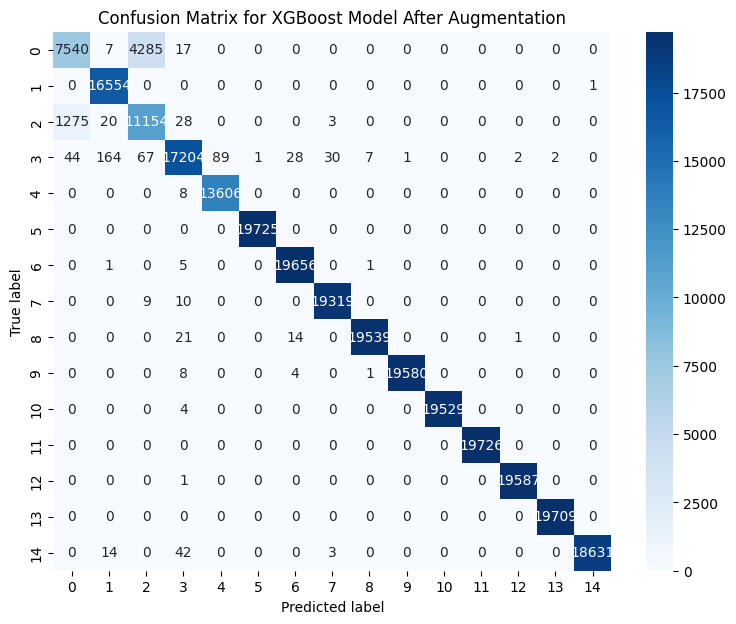

In [ ]:
model_performance(y_train, y_pred_dectree_aug_train, "Confusion Matrix for XGBoost Model After Augmentation")

Class 0 ROC-AUC: 0.99316322
Class 1 ROC-AUC: 0.99997070
Class 2 ROC-AUC: 0.99339445
Class 3 ROC-AUC: 0.99963605
Class 4 ROC-AUC: 0.99999690
Class 5 ROC-AUC: 1.00000000
Class 6 ROC-AUC: 0.99999753
Class 7 ROC-AUC: 0.99999962
Class 8 ROC-AUC: 0.99999964
Class 9 ROC-AUC: 0.99999994
Class 10 ROC-AUC: 0.99999999
Class 11 ROC-AUC: 1.00000000
Class 12 ROC-AUC: 1.00000000
Class 13 ROC-AUC: 1.00000000
Class 14 ROC-AUC: 0.99999880
Micro-average ROC-AUC: 0.99989482


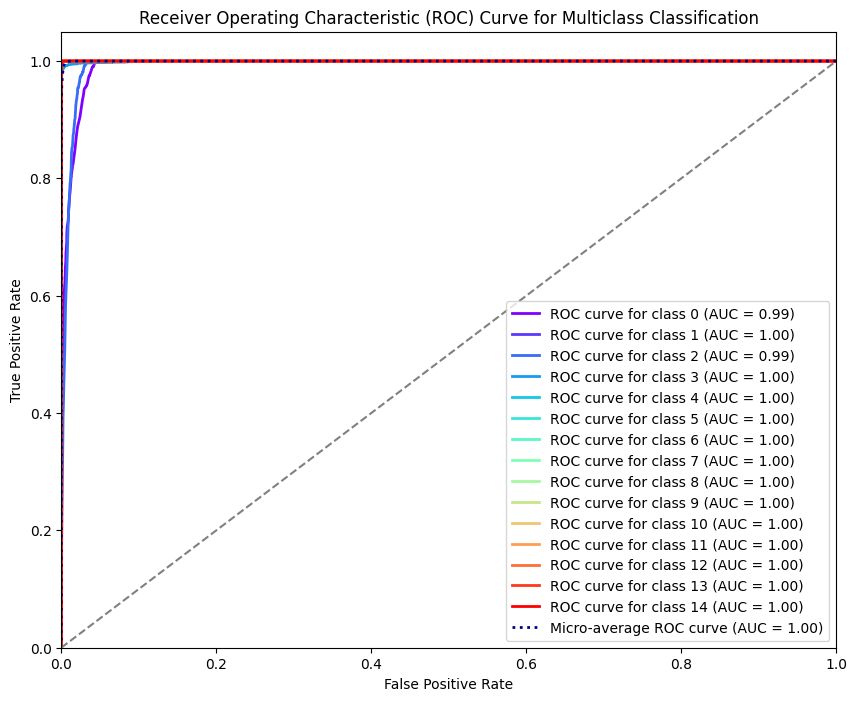

In [ ]:
# Get predicted probabilities instead of class labels.
xg_predictions_train_proba = best_xgb_clf2.predict_proba(X_train)

# Plot the ROC curve for multiclass classification.
plot_multiclass_roc(y_train, xg_predictions_train_proba)

#Testing Results.

Accuracy Score : 0.9762
Precision Score: 0.9776
Recall Score   : 0.9762
F1 Score       : 0.9759
              precision    recall  f1-score   support

           0       0.84      0.63      0.72      2916
           1       0.99      1.00      0.99      4275
           2       0.72      0.89      0.80      3156
           3       0.99      0.97      0.98      4319
           4       0.99      1.00      1.00      3396
           5       1.00      1.00      1.00      4885
           6       1.00      1.00      1.00      4889
           7       1.00      1.00      1.00      4866
           8       1.00      1.00      1.00      4934
           9       1.00      1.00      1.00      4853
          10       1.00      1.00      1.00      5011
          11       1.00      1.00      1.00      4952
          12       1.00      1.00      1.00      4899
          13       1.00      1.00      1.00      4927
          14       1.00      1.00      1.00      4542

    accuracy                          

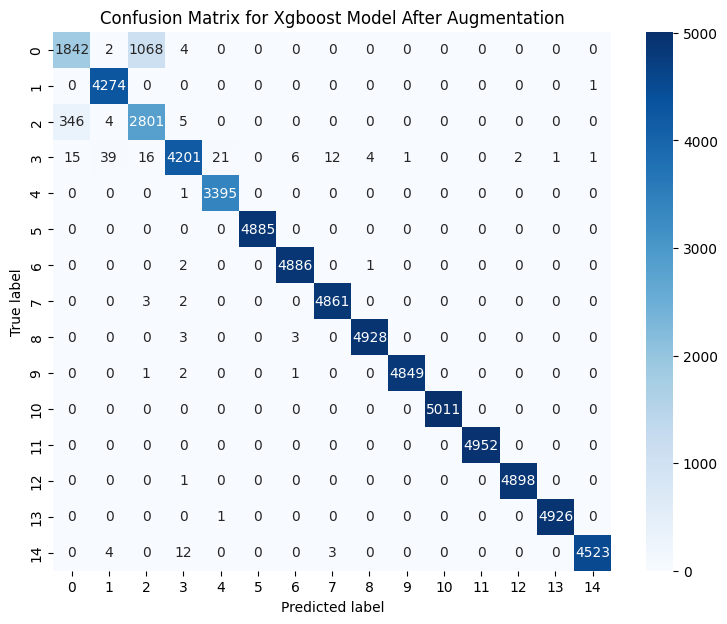

In [ ]:
model_performance(y_test, y_pred_dectree_aug_test, "Confusion Matrix for Xgboost Model After Augmentation")

Class 0 ROC-AUC: 0.99266475
Class 1 ROC-AUC: 0.99996879
Class 2 ROC-AUC: 0.99317674
Class 3 ROC-AUC: 0.99955696
Class 4 ROC-AUC: 0.99999581
Class 5 ROC-AUC: 1.00000000
Class 6 ROC-AUC: 0.99999277
Class 7 ROC-AUC: 0.99999906
Class 8 ROC-AUC: 0.99999979
Class 9 ROC-AUC: 0.99999600
Class 10 ROC-AUC: 1.00000000
Class 11 ROC-AUC: 1.00000000
Class 12 ROC-AUC: 0.99999999
Class 13 ROC-AUC: 0.99999988
Class 14 ROC-AUC: 0.99999812
Micro-average ROC-AUC: 0.99988748


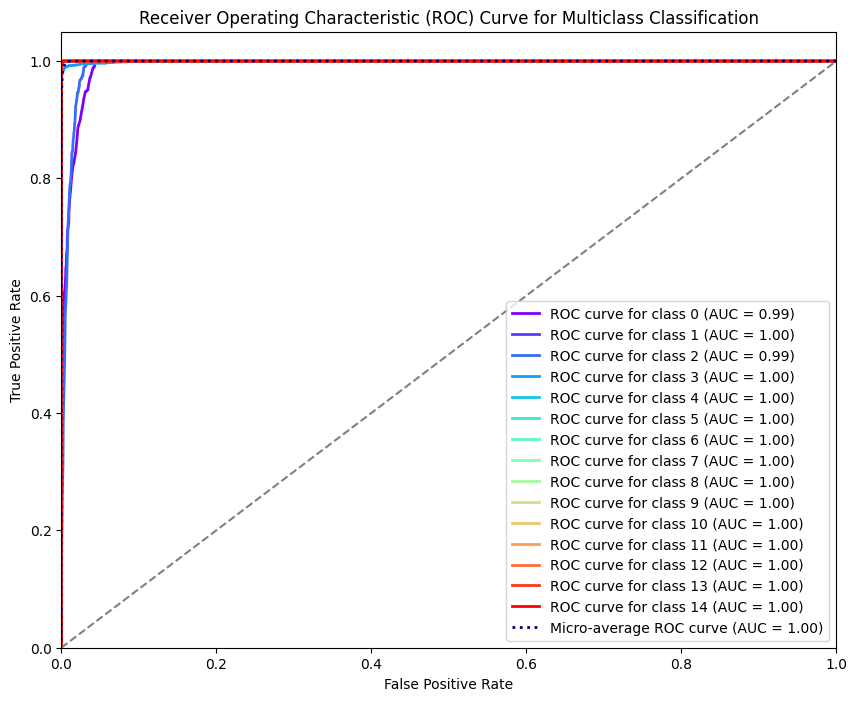

In [ ]:
# Get predicted probabilities instead of class labels.
xg_predictions_test_proba = best_xgb_clf2.predict_proba(X_test)

# Plot the ROC curve for multiclass classification.
plot_multiclass_roc(y_test, xg_predictions_test_proba)

# Extra Tree Classifier.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the ExtraTreesClassifier.
et_clf = ExtraTreesClassifier()

# The RandomizedSearchedCV parameter grid should be defined.
param_dist = {
    'n_estimators': [10, 20, 30],       # The forest's tree count.
    'max_depth': [3, 4, None],       # Deepest the tree can go.
    'min_samples_split': [2, 5, 10], # The bare minimum of samples needed to open an internal node.
    'min_samples_leaf': [1, 2, 4],   # The bare minimum of samples needed at a leaf point.
    'bootstrap': [True, False]       # If samples from bootstraps are used in tree construction.
}

# Set up the RandomizedSearchCV.
random_search = RandomizedSearchCV(et_clf, param_distributions=param_dist, n_iter=5, scoring='accuracy', verbose=1, cv=5)

# Fit the RandomizedSearchCV.
random_search.fit(X_train, y_train)

# Geting the better model.
best_et_clf = random_search.best_estimator_

# Using the training data, make predictions.
et_predictions_train = best_et_clf.predict(X_train)

# Using the testing data, make predictions.
et_predictions = best_et_clf.predict(X_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


# Training Results.

Accuracy Score : 0.9950
Precision Score: 0.9951
Recall Score   : 0.9950
F1 Score       : 0.9950
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     11754
           1       1.00      1.00      1.00     16638
           2       0.93      0.98      0.96     12353
           3       1.00      0.99      0.99     17763
           4       0.99      1.00      1.00     14958
           5       1.00      1.00      1.00     19641
           6       1.00      1.00      1.00     19656
           7       1.00      1.00      1.00     19227
           8       1.00      1.00      1.00     19547
           9       1.00      1.00      1.00     19556
          10       1.00      1.00      1.00     19658
          11       1.00      1.00      1.00     19730
          12       1.00      1.00      1.00     19606
          13       1.00      1.00      1.00     19649
          14       1.00      1.00      1.00     18766

    accuracy                          

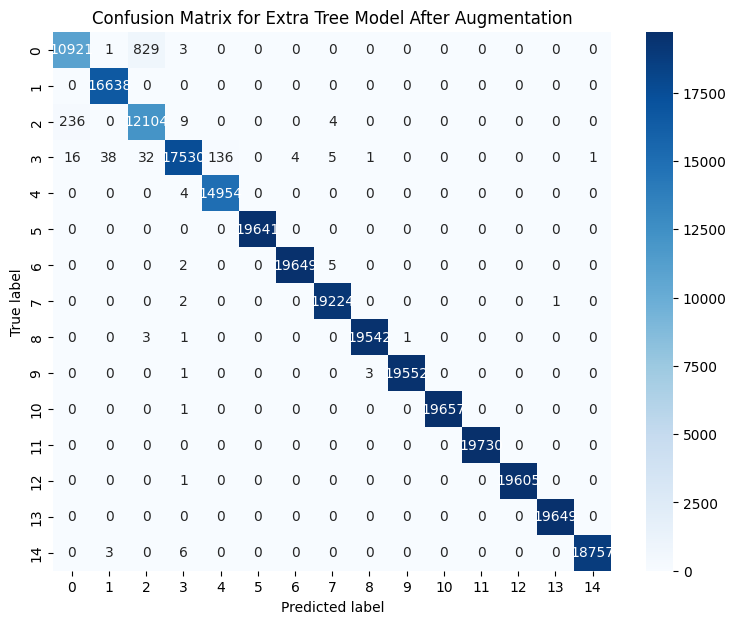

In [ ]:
# Evaluate the model performance.
model_performance(y_train, et_predictions_train, 'Confusion Matrix for Extra Tree Model After Augmentation')

Class 0 ROC-AUC: 0.99966170
Class 1 ROC-AUC: 0.99999999
Class 2 ROC-AUC: 0.99965564
Class 3 ROC-AUC: 0.99997573
Class 4 ROC-AUC: 0.99999953
Class 5 ROC-AUC: 1.00000000
Class 6 ROC-AUC: 0.99999996
Class 7 ROC-AUC: 0.99999996
Class 8 ROC-AUC: 0.99999955
Class 9 ROC-AUC: 0.99999996
Class 10 ROC-AUC: 1.00000000
Class 11 ROC-AUC: 1.00000000
Class 12 ROC-AUC: 1.00000000
Class 13 ROC-AUC: 1.00000000
Class 14 ROC-AUC: 0.99999990
Micro-average ROC-AUC: 0.99998994


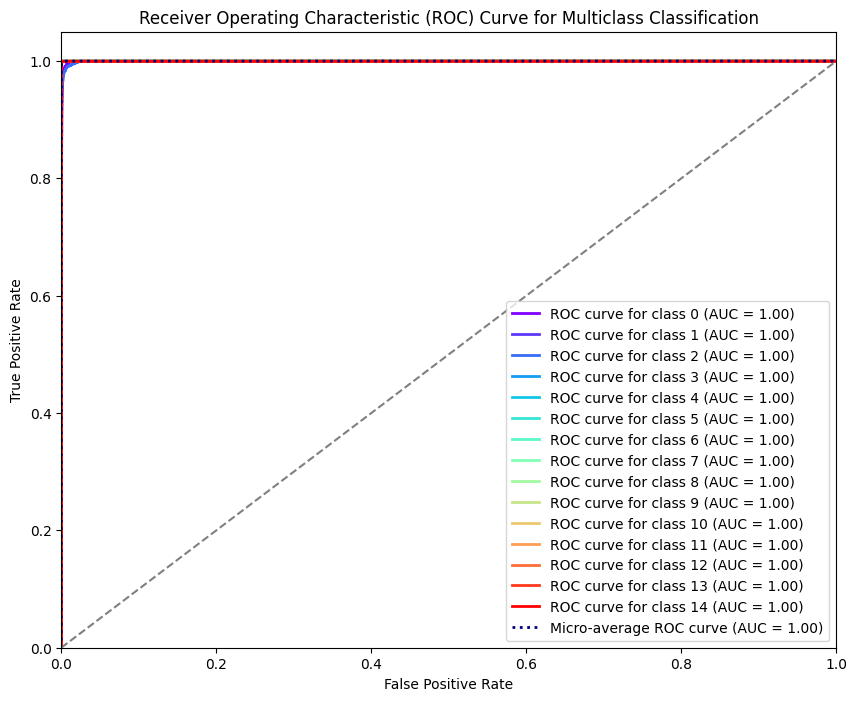

In [ ]:
# Get predicted probabilities instead of class labels.
et_predictions_train_proba = best_et_clf.predict_proba(X_train)

# Plot the ROC curve for multiclass classification.
plot_multiclass_roc(y_train, et_predictions_train_proba)

# Testing Results.

Accuracy Score : 0.9931
Precision Score: 0.9932
Recall Score   : 0.9931
F1 Score       : 0.9931
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2899
           1       0.99      1.00      1.00      4267
           2       0.92      0.96      0.94      3125
           3       1.00      0.98      0.99      4320
           4       0.99      1.00      1.00      3684
           5       1.00      1.00      1.00      4965
           6       1.00      1.00      1.00      4882
           7       1.00      1.00      1.00      4977
           8       1.00      1.00      1.00      4941
           9       1.00      1.00      1.00      4848
          10       1.00      1.00      1.00      4877
          11       1.00      1.00      1.00      4932
          12       1.00      1.00      1.00      4888
          13       1.00      1.00      1.00      4981
          14       1.00      1.00      1.00      4540

    accuracy                          

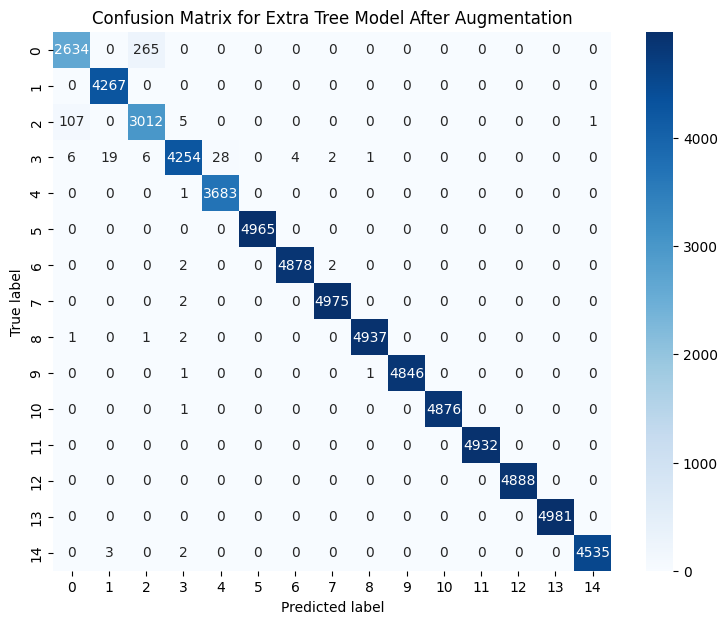

In [ ]:
# Evaluate the model performance.
model_performance(y_test, et_predictions, 'Confusion Matrix for Extra Tree Model After Augmentation')

Class 0 ROC-AUC: 0.99920734
Class 1 ROC-AUC: 0.99999995
Class 2 ROC-AUC: 0.99922743
Class 3 ROC-AUC: 0.99992503
Class 4 ROC-AUC: 0.99999936
Class 5 ROC-AUC: 1.00000000
Class 6 ROC-AUC: 0.99999974
Class 7 ROC-AUC: 0.99999980
Class 8 ROC-AUC: 0.99977869
Class 9 ROC-AUC: 0.99999997
Class 10 ROC-AUC: 0.99999996
Class 11 ROC-AUC: 1.00000000
Class 12 ROC-AUC: 1.00000000
Class 13 ROC-AUC: 1.00000000
Class 14 ROC-AUC: 0.99999934
Micro-average ROC-AUC: 0.99996623


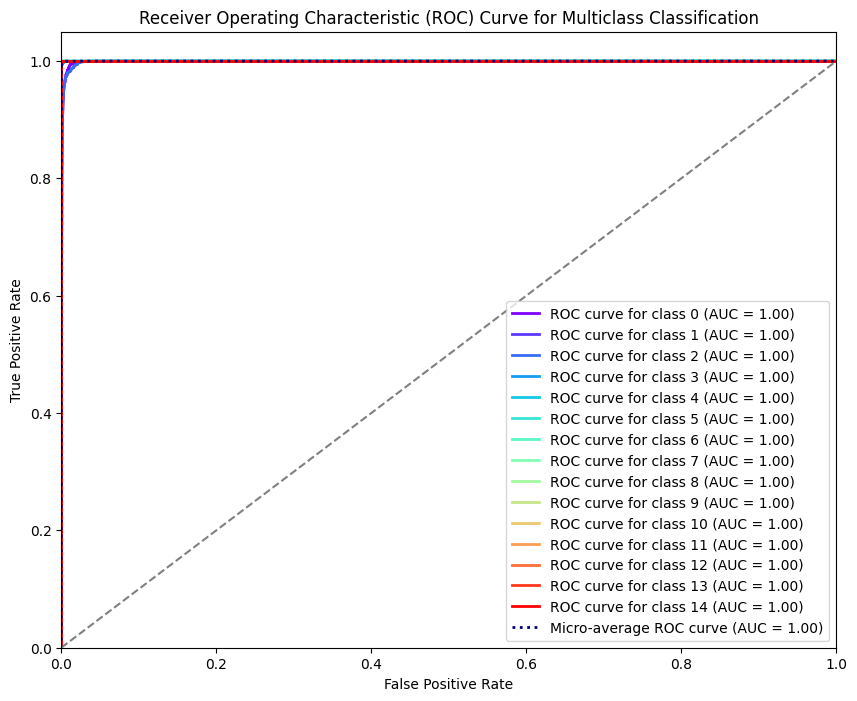

In [ ]:
# Get predicted probabilities instead of class labels.
et_predictions_test_proba = best_et_clf.predict_proba(X_test)

# Plot the ROC curve for multiclass classification.
plot_multiclass_roc(y_test, et_predictions_test_proba)

## LSTM Model.

In [ ]:
! pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.7 MB/s eta 0:00:00


In [ ]:
# Reshape X_train and X_test for use in models that require 3D store.
x_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Check the new shapes.
print(x_train_reshaped.shape)  # (number of characteristics, number of examples, 1) is the expected form.
print(x_test_reshaped.shape)   # (number of characteristics, number of examples, 1) is the expected form.


(268018, 25, 1)
(67005, 25, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your labels.
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [ ]:
n_classes = len(y.unique())

In [ ]:
# Kerastuner, a library for Keras model hyperparameter optimization, is imported as kt.
# It assists in determining the optimal hyperparameters for deep learning model construction.
import kerastuner as kt

# By importing the Sequential system from TensorFlow Keras, we can stack the model's layers in a linear fashion, one after the other.
from tensorflow.keras.models import Sequential

# Adding certain layers: # - LSTM (Long The short-term Memory), an RNN layer type that works well with sequential data (like time series).
#- Dense, a layer of a neural network that is entirely connected.
#- Dropout, a regularization method that avoids overfitting by randomly dropping units during training.
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Bringing in different optimizers from Tensor Keras, which are model weight update algorithms:
#- Adam, an optimizer that calculates adaptive learning rates (Adaptive Moment Estimation).
#- A traditional optimizer with a steady learning rate is SGD (Stochastic Gradient Descent).
#- An adaptive learning rate technique is RMSprop (Roots Mean Square Propagation).
#- Adadelta is an optimizer that adjusts learning rates according to gradient updates' changing window.
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta

def create_classifier(hp):
    classifier = Sequential()

    # LSTM layers.
    # Including an LSTM layer with a configurable number of units in the classifier.
    # Using Keras Tuner's Int method, the number of units is set as a hyperparameter (`lstm_units`), # enabling optimization in stages of 32 between 32 and 128.
    # In order to stack another LSTM layer upon top, this layer must output the entire sequence of outputs, which is ensured by setting "return_sequences=True."
    classifier.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=True, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
    # By varying a portion of the input values to 0, a dropout layer can be added to lessen overfitting.
    # The dropout rate can be optimized in steps of 0.1 from 0.2 to 0.5 since it is specified as a hyperparameter (`dropout`).
    classifier.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    # Including an additional LSTM layer in the classifier where the sequences are not returned (return_sequences=False).
    # To produce a single matrix for classification, this is frequently carried out before to the last dense layers.
    classifier.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=False))
    # After the initial LSTM layer, a second Dropout layer is added to help reduce overfitting even more.
    classifier.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    # A Dense layer is added as a fully linked layer with a configurable number of units. # The hyperparameter (`dense_units`) specifies the number of units, which is optimized in increments of 32 between 32 and 128.
    # The ReLU activating function, which is typical for hidden layers, is used in this layer.
    classifier.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    # The outcome Dense layer is added for classification; the amount of output classes is indicated by 'n_classes'.
    # For multi-class classification problems, the probabilities for each class are output using the softmax activation function.
    classifier.add(Dense(n_classes, activation='softmax'))

    # Optimizer.
    optimizer_name = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])
    if optimizer_name == 'adam':
        optimizer = Adam()
    elif optimizer_name == 'sgd':
        optimizer = SGD()
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop()
    else:
        optimizer = Adadelta()

    classifier.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier

# Initialize the tuner
tuner = kt.RandomSearch(create_classifier, objective='val_accuracy', max_trials=2, executions_per_trial=1)

# Search for the best hyperparameters.
tuner.search(x_train_reshaped, y_train_categorical, epochs=10, validation_data=(x_test_reshaped, y_test_categorical))

# Get the best model and hyperparameters.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters: LSTM Units: {best_hps.get('lstm_units')}, Dense Units: {best_hps.get('dense_units')}, "
      f"Dropout: {best_hps.get('dropout')}, Optimizer: {best_hps.get('optimizer')}")

# Build the better model.
best_model = tuner.hypermodel.build(best_hps)

# Train the better model.
history = best_model.fit(x_train_reshaped, y_train_categorical, epochs=20, validation_data=(x_test_reshaped, y_test_categorical))

# Predict on test data.
lstm_prediction_train = best_model.predict(x_train_reshaped)
lstm_prediction = best_model.predict(x_test_reshaped)

y_train_classes = np.argmax(y_train_categorical, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

lstm_prediction_train2 = np.argmax(lstm_prediction_train, axis=1)
lstm_prediction2 = np.argmax(lstm_prediction, axis=1)

Trial 2 Complete [00h 08m 42s]
val_accuracy: 0.4248638153076172

Best val_accuracy So Far: 0.9133497476577759
Total elapsed time: 00h 16m 31s
Best hyperparameters: LSTM Units: 32, Dense Units: 96, Dropout: 0.4, Optimizer: rmsprop
Epoch 1/20
8376/8376 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - accuracy: 0.6287 - loss: 1.1292 - val_accuracy: 0.8578 - val_loss: 0.4109
Epoch 2/20
8376/8376 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.8418 - loss: 0.4876 - val_accuracy: 0.8817 - val_loss: 0.3369
Epoch 3/20
8376/8376 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 0.8615 - loss: 0.4141 - val_accuracy: 0.8881 - val_loss: 0.2889
Epoch 4/20
8376/8376 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 0.8727 - loss: 0.3770 - val_accuracy: 0.9019 - val_loss: 0.2616
Epoch 5/20
8376/8376 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 0.8803 - loss: 0.3548 - val_accuracy: 0.9255 - val_loss: 0.2491
Epoch 6/20
8376/8376 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.8851 - loss: 0.3357 - val_accuracy: 0.9166 - v

# Testing Results.

Accuracy Score : 0.9380
Precision Score: 0.9450
Recall Score   : 0.9380
F1 Score       : 0.9352
              precision    recall  f1-score   support

           0       0.81      0.36      0.50      2890
           1       0.95      0.99      0.97      4270
           2       0.60      0.91      0.72      3160
           3       0.95      0.82      0.88      4231
           4       0.98      0.87      0.92      3709
           5       0.99      0.95      0.97      4908
           6       0.98      0.99      0.99      4922
           7       0.90      0.99      0.94      4865
           8       0.99      1.00      0.99      4909
           9       0.99      0.98      0.98      4888
          10       0.98      1.00      0.99      4939
          11       1.00      1.00      1.00      5014
          12       0.99      0.98      0.99      4869
          13       0.88      0.99      0.93      4873
          14       1.00      0.97      0.99      4558

    accuracy                          

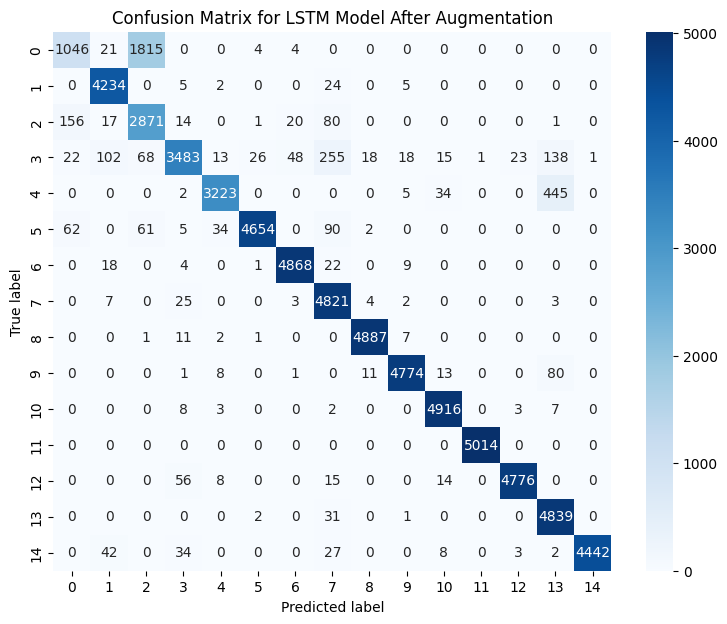

In [ ]:
model_performance(y_test, lstm_prediction2, "Confusion Matrix for LSTM Model After Augmentation")

Class 0 ROC-AUC: 0.98552859
Class 1 ROC-AUC: 0.99947388
Class 2 ROC-AUC: 0.98642466
Class 3 ROC-AUC: 0.98784077
Class 4 ROC-AUC: 0.99927296
Class 5 ROC-AUC: 0.99967879
Class 6 ROC-AUC: 0.99971596
Class 7 ROC-AUC: 0.99949525
Class 8 ROC-AUC: 0.99954313
Class 9 ROC-AUC: 0.99937101
Class 10 ROC-AUC: 0.99992731
Class 11 ROC-AUC: 1.00000000
Class 12 ROC-AUC: 0.99989920
Class 13 ROC-AUC: 0.99865547
Class 14 ROC-AUC: 0.99950452
Micro-average ROC-AUC: 0.99890089


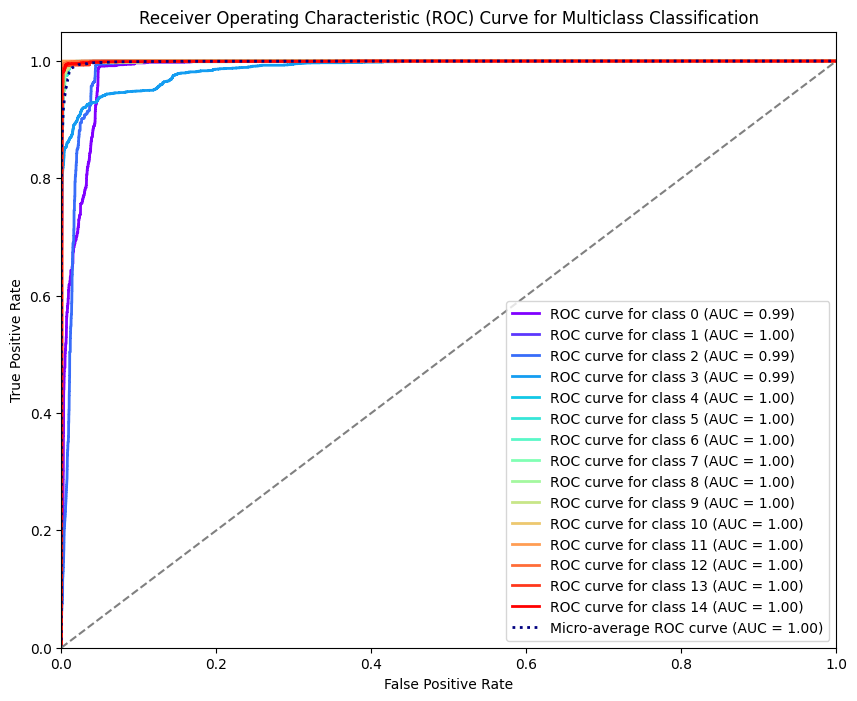

In [ ]:
plot_multiclass_roc(y_test_classes, lstm_prediction)